All files are at: https://github.com/benapa/python_face_detection

# **Image representation**





In [ ]:
import numpy
import matplotlib.pyplot as pyplot

sample_array = numpy.array([[0, 255], 
                            [255, 0]], numpy.uint8)
pyplot.imshow(sample_array, cmap='gray', vmin=0, vmax=255)
pyplot.show()

In [ ]:
import numpy
import matplotlib.pyplot as pyplot
sample_array = numpy.array([[0, 255, 0], 
                            [255, 0, 255]], numpy.uint8)
pyplot.imshow(sample_array, cmap='gray', vmin=0, vmax=255)
pyplot.show()

In [ ]:
import numpy
import matplotlib.pyplot as pyplot
sample_array = numpy.array([[0, 255, 0], 
                            [255, 0, 255], 
                            [0, 255, 0]], numpy.uint8)
pyplot.imshow(sample_array, cmap='gray', vmin=0, vmax=255)
pyplot.show()

In [ ]:
import numpy
import matplotlib.pyplot as pyplot
pixel1 = [85, 85, 255]
pixel2 = [51, 187, 200]
sample_array = numpy.array([[pixel1, pixel2, pixel1],
                            [pixel2, pixel1, pixel2],
                            [pixel1, pixel2, pixel1]], numpy.uint8)
pyplot.imshow(sample_array)
pyplot.show()

In [ ]:
#Heart image

More to read: https://github.com/gmattie/Data-Pixels

# **Read images from files**

In [ ]:
from matplotlib import pyplot


pixels = pyplot.imread('test.jpg')
pyplot.imshow(pixels)
pyplot.show()


In [ ]:
pixels

# **Introduction to AI In Image Processing**

AI stands for Artificial Intelligence

**Face detection** could be considered as one variant of object detection problems. Specifically, given an image containing faces, the task is to derive a rectangular face bounding box. 
  - Haar cascades face detection: Haar-cascade algorithm proposed in the Viola-Jones object detection framework which contains four computation steps: Integral Image Representation, Haar-like feature extraction and selec-tion, Adaboost training, and cascading classifiers. Haar-cascade algorithm and its hand-craft feature companions (e.g., HoG , SURF , LBP , etc.) is computationally efficient (15 fps at 900MHz CPU). However, it is designed for frontal face detection and it is not robust to variations in facial pose, orientation, occlusion, and illumination. Its implementation can be found at: https://pypi.org/project/opencv-python/. 
  - MTCNN face detection: Multi-task Cascaded Convolutional Network is one popular face detection module consisting of three cascaded CNN, namely, P-Net, R-Net, and O-Net, respectively. Its implementation can be found at: https://pypi.org/project/mtcnn/. 

In [ ]:
!pip install opencv-python
!pip install MTCNN

In [ ]:
from matplotlib import pyplot
import cv2


pixels = pyplot.imread('test.jpg')
pyplot.imshow(pixels)
pyplot.show()

# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# Convert color image to grayscale 
gray = cv2.cvtColor(pixels, cv2.COLOR_BGR2GRAY)
# detect faces in the image
results = face_cascade.detectMultiScale(gray, 1.3, 5)

for (x1, y1, width, height) in results:
	if y1<0:
		y1=0
	if x1<0:
		x1=0
	x2, y2 = x1 + width, y1 + height
# extract the face
	face = pixels[y1:y2, x1:x2]
	pyplot.imshow(face)
	pyplot.show()

In [ ]:
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN 


pixels = pyplot.imread('test.jpg')
pyplot.imshow(pixels)
pyplot.show()

# create MTCNN detector to detect faces in the image
detector = MTCNN()
# use MTCNN detector to detect faces in the image
results = detector.detect_faces(pixels)

for i in results:
	(x1, y1, width, height) = i['box']
	if y1<0:
		y1=0
	if x1<0:
		x1=0
	x2, y2 = x1 + width, y1 + height
# extract the face
	face = pixels[y1:y2, x1:x2]
	pyplot.imshow(face)
	pyplot.show()

# **The other side of AI**

https://www.google.com/search?q=chimpanzee&rlz=1C1CHBF_enTH911TH911&tbm=isch&source=iu&ictx=1&fir=EaJycokKrelGMM%252ClrwDQBaWanHoGM%252C_&vet=1&usg=AI4_-kT1ypcOc1KtV0vxtsOTDIM-jW6AaQ&sa=X&ved=2ahUKEwikn56nye7yAhXlxTgGHXczCMgQ_h16BAhOEAE#imgrc=aN36Wj-hoeQNwM&imgdii=MXyJPeNmQ58ZuM

In [ ]:
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN 


#pixels = pyplot.imread('test.jpg')
pixels = pyplot.imread('chimpanzee7.jpg')
pyplot.imshow(pixels)
pyplot.show()

# create MTCNN detector to detect faces in the image
detector = MTCNN()
# use MTCNN detector to detect faces in the image
results = detector.detect_faces(pixels)

for i in results:
	(x1, y1, width, height) = i['box']
	if y1<0:
		y1=0
	if x1<0:
		x1=0
	x2, y2 = x1 + width, y1 + height
# extract the face
	face = pixels[y1:y2, x1:x2]
	pyplot.imshow(face)
	pyplot.show()

# **AI performance**

ความผิดพลาดในการตรวจจับใบหน้า สามารถแบ่งได้เป็น 2 ชนิด คือ
- False detection --> detect non-face object as faces 
- False rejection --> fail to detect faces from images with faces

ให้ทำการตรวจสอบ false detection ของ MTCNN และ OpenCV face detector โดยการ

1.   เปิดโฟลเดอร์ชื่อ NotFace
2.   ทดสอบผลลัพธ์การตรวจจับใบหน้าสำหรับแต่ละภาพในโฟลเดอร์ดังกล่าว
3.   นับ**จำนวนใบหน้า**ที่มีการตรวจจับโดยโปรแกรม (false detection)

    MTCNN's False detection = ________________

    OpenCV's False detection = ________________

จากนั้นให้ทำการตรวจสอบ false rejection ของ MTCNN and OpenCV face detector โดยการ

1.   เปิดโฟลเดอร์ชื่อ Face
2.   ทดสอบผลลัพธ์การตรวจจับใบหน้าสำหรับแต่ละภาพในโฟลเดอร์ดังกล่าว
3.   นับ**จำนวนใบหน้า**ที่โปรแกรมไม่ตรวจจับ (false rejection)

    MTCNN's False rejection = ________________

    OpenCV's False rejection = ________________




In [ ]:
import numpy
from time import sleep
import sys

lines = [" \"Stay hungry stay foolish \", Steve Jobs ", "Thank you everyone. Hope you enjoy!" ]
for line in lines:          # for each line of text (or each message)
    for c in line:          # for each character in each line
        print(c, end='')    # print a single character, and keep the cursor there.
        sys.stdout.flush()  # flush the buffer
        sleep(0.12)          # wait a little to make the effect look good.
    print('')               # line break (optional, could also be part of the message)

smiles = numpy.array([[255, 255,   0, 255,   0 ,255 ,255 ], 
                      [255, 255,   0, 255,   0 ,255 ,255 ], 
                      [255, 255, 255, 255, 255 ,255 ,255 ], 
                      [255, 255, 255, 255, 255 ,255 ,255 ], 
                      [255, 0  , 255, 255, 255 ,0 ,255 ], 
                      [255, 255, 0  , 0  , 0   ,255 ,255 ]], numpy.uint8)
pyplot.imshow(smiles, cmap='gray', vmin=0, vmax=255)
pyplot.show()



# **Working with files from Google drive**

In [ ]:
# 1. mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


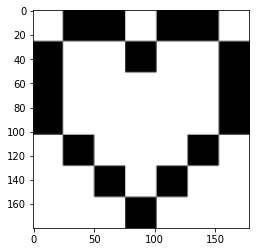

In [ ]:
# 2. read files in drive

from matplotlib import pyplot


pixels = pyplot.imread('/content/drive/MyDrive/Images/heart.jpg')
pyplot.imshow(pixels)
pyplot.show()

Type filename you want to process:heart.jpg


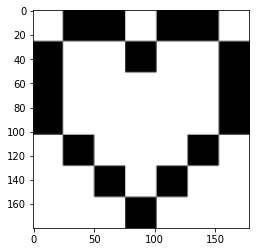

In [ ]:
filename = input('Type filename you want to process:')
pixels = pyplot.imread('/content/drive/MyDrive/Images/'+filename)
pyplot.imshow(pixels)
pyplot.show()